# **MD/PhD Acceptance Analyzer**

### Importing required packages

In [1]:
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import math
import string
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

### Functions required for analysis (run these first)

In [2]:
def text_parser(filepath):
    """
    Function for parsing through a .txt file of schools with users + dates.
    Provide a filepath for each .txt file
    """
    school_list = []
    file = open(filepath)
    for line in file:
        school_list.append(line)
    return(school_list)

In [3]:
def cycle_generator(text_list, cycle_start_year):
    """
    Function to select schools, users, complete & acceptance dates.
    Make sure to clean and edit the txt files before running this - otherwise it throws errors with bad dates.
    Provide a text list from text_parser and the start year of the cycle.
    """
    schools = []
    first_users = []
    other_users = []
    acceptances = []
    
    # Finding the list of schools, the first and other usernames, and all the complete/acceptance dates in parentheses ().
    for school in text_list:
        try:
            s = re.findall(pattern="^(.*?):", string=school)
            for sc in s:
                schools.append(sc)
            
            user1 = re.findall(pattern=":(.*?)\(", string=school)[0]
            user1 = user1.replace(" ", "")
            first_users.append(user1)
            
            users = re.findall(pattern="\),(.*?)\(", string=school)
            users = [u.replace(" ", "") for u in users]
            other_users.append(users)
            
            A = re.findall(pattern="\((.*?)\)", string=school)
            int_acc = []
            for x in A:
                x = x.replace(" ", "")
                x = x.upper()
                int_acc.append(x)
            acceptances.append(int_acc)
        except:
            print("Typo in the following school:", school)
    
    # Combining the first and other users into one list
    all_users = []
    for f, o in zip(first_users, other_users):
        f = [f]
        total = f + o
        all_users.append(total)
    
    # Merging everything into a dataframe
    A_df = pd.DataFrame({'schools': schools, 'users': all_users, 'acceptances_raw': acceptances})
    
    # Exploding the dataframe on users and acceptance dates and merging to unlist the users and acceptance dates
    A_df_users = A_df.loc[:, ['schools', 'users']].explode('users').reset_index(drop=True)
    A_df_acc = A_df.loc[:, ['schools', 'acceptances_raw']].explode('acceptances_raw').reset_index(drop=True)
    A_df_users['acceptances_raw'] = A_df_acc['acceptances_raw']
    A_df_all = A_df_users
    
    # Finding all the acceptance dates (A:).  Adding the years and converting to dates
    acc = []
    for aa in A_df_all['acceptances_raw']:
        try:
            a = re.findall(pattern="A:(.*)", string=aa)[0]
            a_dates = a.split('/')
            if int(a_dates[0]) > 6:
                try:
                    a = a + "/" + str(cycle_start_year)
                    a = datetime.strptime(a, '%m/%d/%Y')
                except:
                    a = np.nan        
            if int(a_dates[0]) < 6:
                try:
                    a = a + "/" + str(cycle_start_year + 1)
                    a = datetime.strptime(a, '%m/%d/%Y')
                except:
                    a = np.nan
            acc.append(a)
        except:
            print("Typo in the following acceptance entry:", aa)
    
    # Making a new column for accetpance dates
    A_df_all['acceptances'] = acc
    
    # Inputting the cycle information
    A_df_all['cycle'] = str(cycle_start_year) + "-" + str(cycle_start_year + 1)
    
    # Returning the final df.  Comment out if giving an error
    return(A_df_all)

### Importing the .txt school list files and making dataframes for each cycle using the cycle_generator() function

In [4]:
# Give a central directory were you downloaded everything.  Importing the .txt files

directory = "C:/Users/TooFastDan/Documents/MD_PhD Application/Python Analysis/SDN acceptances"
#cycle_2021 = text_parser(filepath=directory + "/2021-2022 acceptances.txt")
cycle_2020 = text_parser(filepath=directory + "/2020-2021 acceptances.txt")
cycle_2019 = text_parser(filepath=directory + "/2019-2020 acceptances.txt")
cycle_2018 = text_parser(filepath=directory + "/2018-2019 acceptances.txt")

In [5]:
# Generating dataframes from the txt files.  If giving an error, comment out the print functions and the return statement 
# in the cycle_generator() function.  Then edit the txt files to fix all typoes (this part sucks)

#a_2021 = cycle_generator(text_list=cycle_2021, cycle_start_year=2021)
a_2020 = cycle_generator(text_list=cycle_2020, cycle_start_year=2020)
a_2019 = cycle_generator(text_list=cycle_2019, cycle_start_year=2019)
a_2018 = cycle_generator(text_list=cycle_2018, cycle_start_year=2018)
print("2020-2021 cycle users:", len(a_2020), 
      "\n2019-2020 cycle users:", len(a_2019),
      "\n2018-2019 cycle users:", len(a_2018))

2020-2021 cycle users: 149 
2019-2020 cycle users: 112 
2018-2019 cycle users: 153


## Cleaning the data some more and Exporting excel files

In [6]:
# Redoing the cycle column
#a_2021['cycle'] = '2021-2022'
a_2020['cycle'] = '2020-2021'
a_2019['cycle'] = '2019-2020'
a_2018['cycle'] = '2018-2019'

# Dropping na values for acceptances (optional - nice if you want to graph things, but not if you want a complete dataset)
#a_2021 = a_2021[a_2021['acceptances'].notna()]
#a_2020 = a_2020[a_2020['acceptances'].notna()]
#a_2019 = a_2019[a_2019['acceptances'].notna()]
#a_2018 = a_2018[a_2018['acceptances'].notna()]

# Sorting by acceptance invite date
#a_2021 = a_2021.sort_values(by="acceptances")
a_2020 = a_2020.sort_values(by="acceptances")
a_2019 = a_2019.sort_values(by="acceptances")
a_2018 = a_2018.sort_values(by="acceptances")

# Numbering every acceptance
#a_2021['rank'] = [a+1 for a in range(len(a_2021))]
a_2020['rank'] = [a+1 for a in range(len(a_2020))]
a_2019['rank'] = [a+1 for a in range(len(a_2019))]
a_2018['rank'] = [a+1 for a in range(len(a_2018))]

# Creating a percent for suvival analysis
#a_2021['percent'] = (a_2021['rank'] / len(a_2021)) * 100
a_2020['percent'] = (a_2020['rank'] / len(a_2020)) * 100
a_2019['percent'] = (a_2019['rank'] / len(a_2019)) * 100
a_2018['percent'] = (a_2018['rank'] / len(a_2018)) * 100

# Concatenating all application cycles into one df
a_all = pd.concat([a_2020, a_2019, a_2018], axis=0, ignore_index=True)

In [9]:
# Deidentifying everyone, sorting, and exporting to xlsx

#a_all_de = a_all.drop(["users", "rank", "percent"], axis=1)
#a_all_de["cycle"] = pd.Categorical(a_all_de["cycle"], ["2020-2021", "2019-2020", "2018-2019"])
#a_all_de = a_all_de.sort_values(by=["cycle", "schools"])
#a_all_de.to_excel(directory+"/all_acceptances_deidentified.xlsx", index=False)

In [8]:
# Viewing the dataframe, exporting to xlsx, and counting the entries in each file

display(a_all)
#a_all.to_excel(directory+"/all_acceptances_processed.xlsx", index=False)

print("2020-2021 cycle users:", len(a_2020), 
      "\n2019-2020 cycle users:", len(a_2019),
      "\n2018-2019 cycle users:", len(a_2018))

,schools,users,acceptances_raw,acceptances,cycle,rank,percent
0,UT San Antonio,CashewBestNut,"I:9/3,A:10/20",2020-10-20,2020-2021,1,0.671141
1,UT San Antonio,plsletmebeadoctor,"I:9/3,A:10/20",2020-10-20,2020-2021,2,1.342282
2,University of Virginia,theOshow,"I:9/28,A:10/21",2020-10-21,2020-2021,3,2.013423
3,University of Florida,plsletmebeadoctor,"I:9/24,A:10/21",2020-10-21,2020-2021,4,2.684564
4,University of Pittsburgh,H0513,"I:9/21,A:10/22",2020-10-22,2020-2021,5,3.355705
...,...,...,...,...,...,...,...
409,Rutgers,CashewGirl,"I:9/X,A:10/X",NaT,2018-2019,149,97.385621
410,UC San Diego,TheJooce,"I:1/X,A:2/X",NaT,2018-2019,150,98.039216
411,University of Michigan,nuraaa99,"I:9/X,A:10/X",NaT,2018-2019,151,98.692810
412,University of Pittsburgh,nuraaa99,"I:11/X,A:12/X",NaT,2018-2019,152,99.346405


2020-2021 cycle users: 149 
2019-2020 cycle users: 112 
2018-2019 cycle users: 153


# **Figures**

## Kaplan-Meier Suvival Curves

<ipython-input-45-d55c55bd83ce>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels)


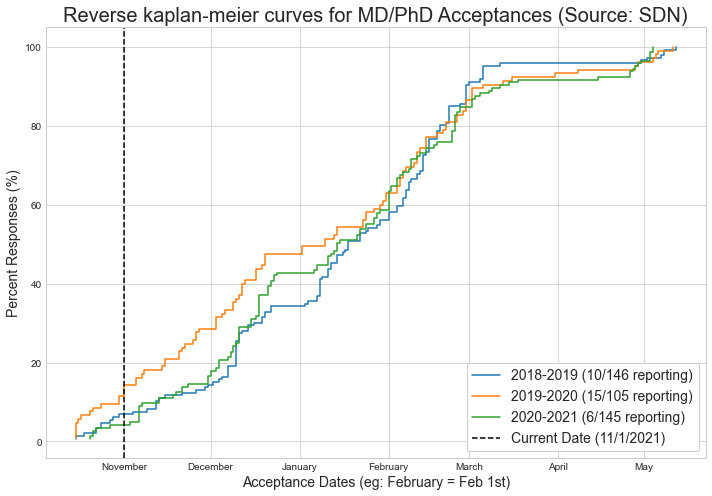

In [45]:
%matplotlib inline

# Style and figure size
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting one line for each cycle.  Important to set the same year for overlay
ax.step(x=a_2018['acceptances'], y=a_2018['percent'], label="2018-2019 (10/146 reporting)", where="post")
ax.step(x=a_2019['acceptances'], y=a_2019['percent'], label="2019-2020 (15/105 reporting)", where="post")
ax.step(x=a_2020['acceptances'], y=a_2020['percent'], label="2020-2021 (6/145 reporting)", where="post")
#ax.step(x=a_2021['acceptances'], y=a_2021['percent'], label="2021-2022 (???/??? reporting)", where="post")

# Plotting vertical line for the current date
plt.axvline(x=datetime.strptime("11/1/2020", '%m/%d/%Y'), color="#000000", ls="--", lw=1.5, label='Current Date (11/1/2021)')

# Tick, axis, and title labels
tick_labels = ['November', 'December', 'January', 'February', 'March', 'April', 'May']
ax.set_xticklabels(tick_labels)
ax.set_xlabel("Acceptance Dates (eg: February = Feb 1st)", fontsize=14)
ax.set_ylabel("Percent Responses (%)", fontsize=14)
ax.set_title("Reverse kaplan-meier curves for MD/PhD Acceptances (Source: SDN)", fontsize=20)
ax.legend(fontsize=14, loc='lower right', facecolor='white', framealpha=1, frameon=True)

# Displaying the figure
plt.tight_layout()

# Saving the figure
#plt.savefig(directory+"/kaplan-meier acceptances.png", dpi=300)

## Population Density Curves

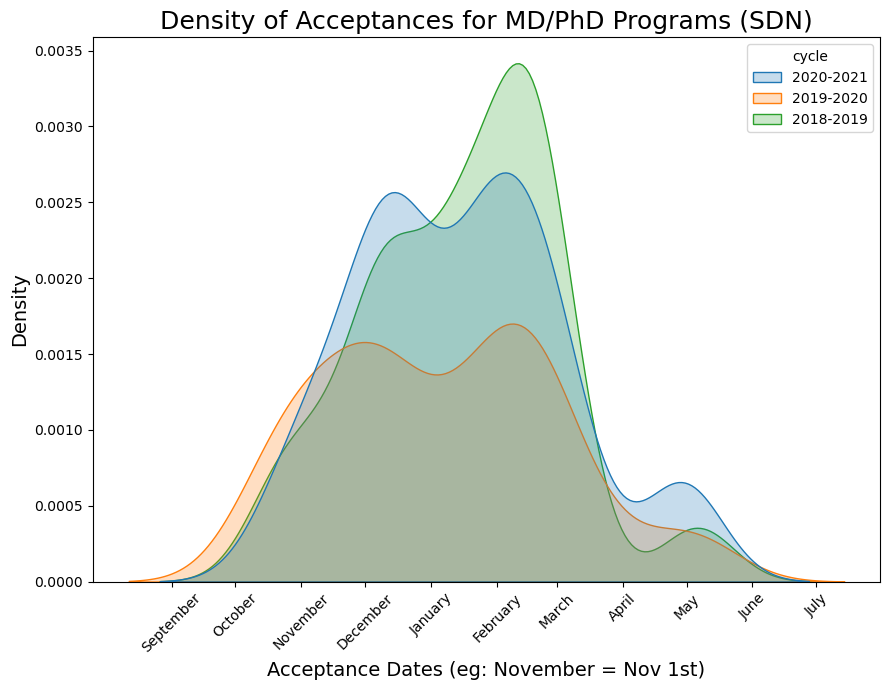

In [20]:
%matplotlib inline

# Setting the style and figure size
#sns.set_style("ticks")
plt.style.use("default")
plt.figure(figsize=(9, 7))

# Density Plot
plot = sns.kdeplot(data=a_all, x="acceptances", hue='cycle', fill=True)

# Tick, axis, and title labels
tick_dates = ["9/1/2020", "10/1/2020", "11/1/2020", "12/1/2020", "1/1/2021", "2/1/2021", "3/1/2021", "4/1/2021", "5/1/2021", "6/1/2021", "7/1/2021"]
tick_dt = [datetime.strptime(date_x, '%m/%d/%Y') for date_x in tick_dates]
plt.xticks(tick_dt, rotation=45)
tick_months = ["September", "October", "November", "December", "January", "February", "March", "April", "May", "June", "July"]
plot.set_xticklabels(tick_months)
plot.set_xlabel("Acceptance Dates (eg: November = Nov 1st)", fontsize=14)
plot.set_ylabel("Density", fontsize=14)
plot.set_title("Density of Acceptances for MD/PhD Programs (SDN)", fontsize=18)

# Displaying the figure
plt.tight_layout()

# Saving the figure
#plt.savefig(directory+"/acceptance_kde.png", dpi=300)

## Making a huge graph for all individual acceptance dates per school (takes a long time to process)

<ipython-input-46-377ffcd51613>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['November', 'December', 'January', 'February', 'March', 'April', 'May'])


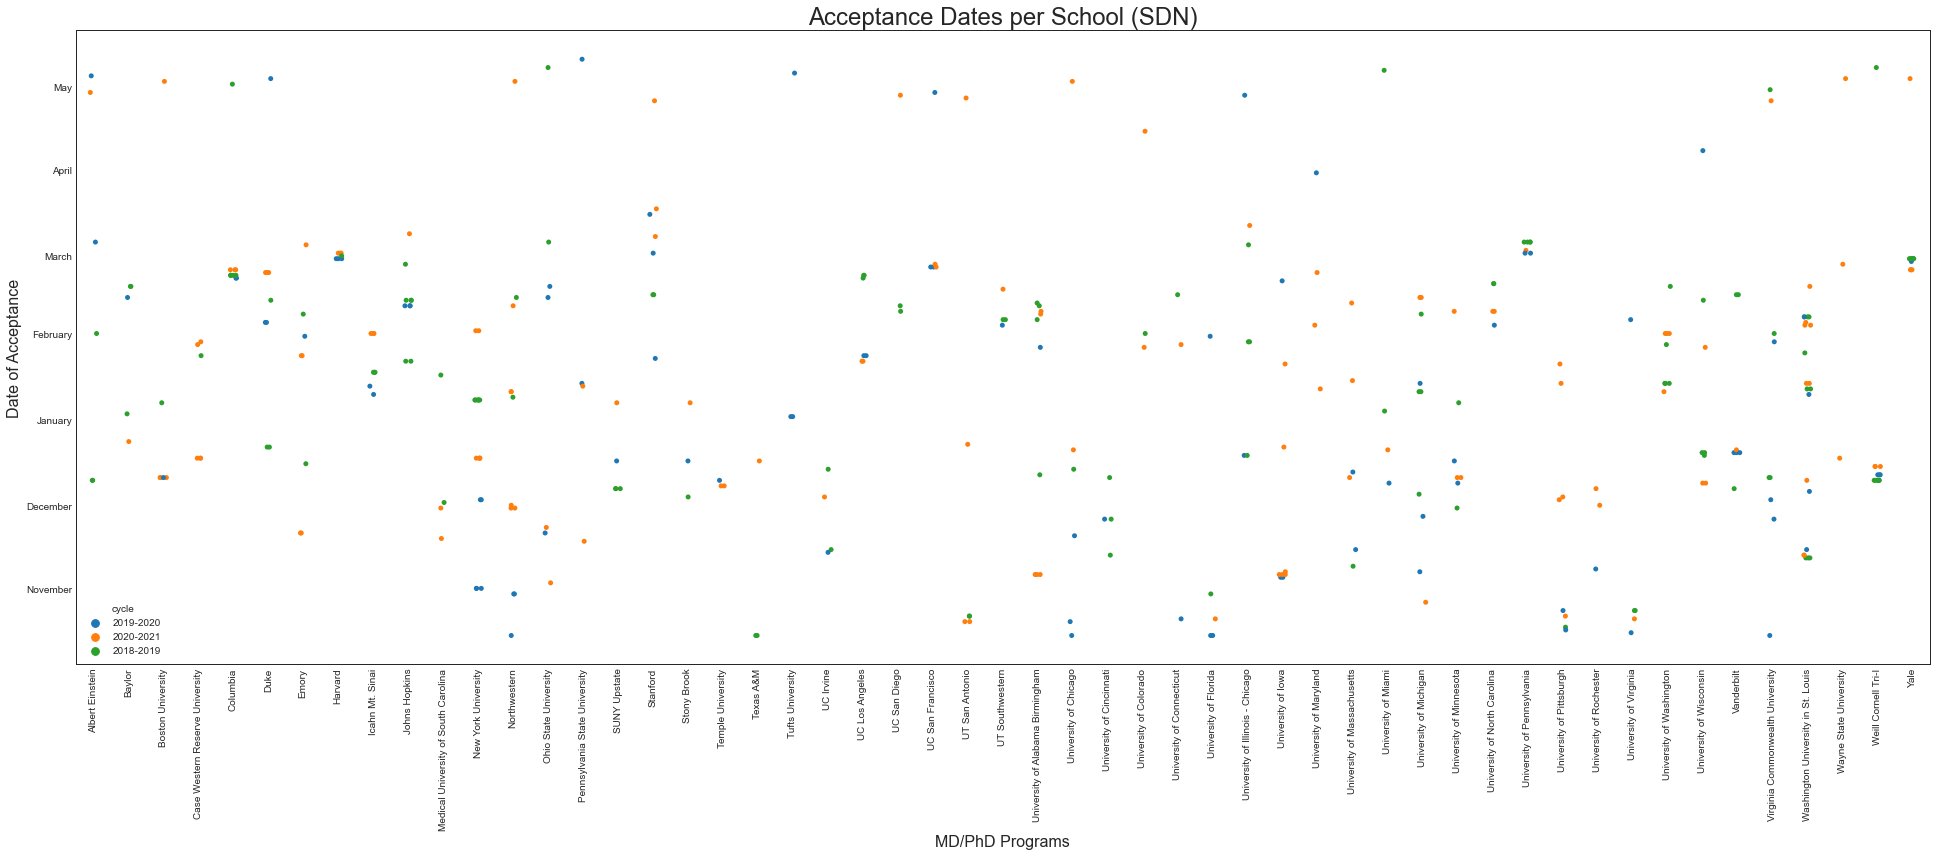

In [46]:
%matplotlib inline

# Setting the figure style and size (big figure)
sns.set_style("ticks")
plt.figure(figsize=(27, 12))

# Filtering out schools with less than 2 acceptaces
a_school_counts = pd.DataFrame(a_all["schools"].value_counts()).reset_index()
a_school_counts.columns = ["schools", "count"]
a_school_counts = a_school_counts[a_school_counts['count'] > 2]
school_list = list(a_school_counts["schools"])

# Extra processing - filtering, alphabetical sorting, and categorical datatypes to make figures cleaner
a_all2 = a_all[a_all["schools"].isin(school_list)]
a_all2 = a_all2.sort_values("schools")
school_order = CategoricalDtype(a_all2["schools"].unique(), ordered=True)
a_all2['schools'] = a_all2["schools"].astype(school_order)
a_all2 = a_all2.sort_values("schools")

# Plotting a stripplot for each interview invite date, colored by cycle
plot = sns.stripplot(data=a_all2, x='schools', y='acceptances', hue='cycle')

# Tick, axis, and title labels
plt.xticks(rotation=90)
plot.set_xlabel("MD/PhD Programs", fontsize=16)
plot.set_ylabel("Date of Acceptance", fontsize=16)
plot.set_yticklabels(['November', 'December', 'January', 'February', 'March', 'April', 'May'])
plot.set_title("Acceptance Dates per School (SDN)", fontsize=24)

# Displaying the figure
plt.tight_layout()

# Saving the figure
#plt.savefig(directory+"/all_acceptances.png", dpi=300)

## Making a plot of the most common days of the week to be sent an acceptance (use different years)

In [51]:
# Translating between dates and days of the week

# 0 = monday, 1 = tueday, 2 = wednesday, 3 = thursday, 4 = friday, 5 = saturday, 6 = sunday
a_all["weekdays"] = [a.weekday() for a in a_all["acceptances"]]
a_all["weekdays"].replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}, inplace=True)
days_df = pd.DataFrame(a_all["weekdays"].value_counts().reset_index())
days_df.columns = ["Week_Day", "Count"]

# Sorting according to weekday
days_df["Week_Day"] = pd.Categorical(days_df["Week_Day"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
days_df.sort_values("Week_Day", inplace=True)
days_df

,Week_Day,Count
2,Monday,69
1,Tuesday,85
4,Wednesday,59
3,Thursday,64
0,Friday,99
5,Saturday,10
6,Sunday,10


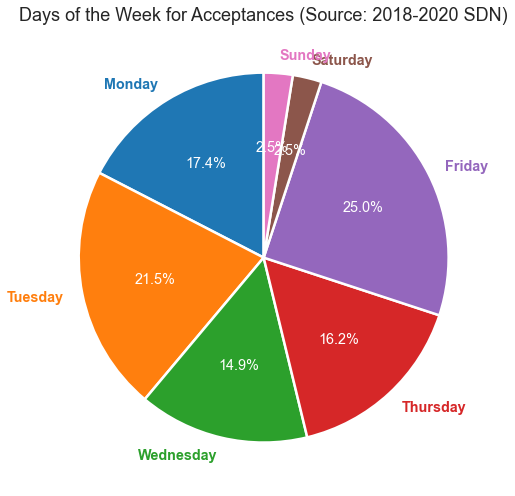

In [53]:
%matplotlib inline

# Setting the figure style and size
fig, ax = plt.subplots(figsize=(9, 7))

# Plotting the pie chart with some custom colors and functions
patches, texts, pcts = ax.pie(x=days_df['Count'], labels=days_df['Week_Day'], autopct='%.1f%%',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
#for each wedge, set the corresponding text label color to the wedge's face color
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

# Labelling the title
ax.set_title("Days of the Week for Acceptances (Source: 2018-2020 SDN)", fontsize=18)

# Displaying the figure
plt.tight_layout()

# Saving the figure
#plt.savefig(directory+"/weekday acceptances pie charts.jpg", dpi=300)

### Unfinished stuff 

# **Generating Summary Statistics**

In [18]:
def summary_stats(df):
    """
    Creating some summary statistics and making dataframes to export.
    Returns 3 dataframes.
    """
    total_iis = len(df)
    total_programs = len(pd.unique(df['schools']))
    sdn_users = len(pd.unique(df['users']))
    summary_stats = [total_iis, total_programs, sdn_users]
    rownames = ["Total number of interview invites reported on SDN", 
                "Number of programs reporting interviews on SDN",
                "Number of unique users on SDN"]
    summary_df = pd.DataFrame(summary_stats, index=rownames, columns=["Number Reporting"])
    school_iis = pd.DataFrame({"II's per school on SDN": df['schools'].value_counts()})
    user_iis = pd.DataFrame({"II's per SDN user": df['users'].value_counts()})
    return(summary_df, school_iis, user_iis)

In [19]:
# Calling the summary_stats() function - better if used with no NA values are dropped 

summary_df, school_iis, user_iis = summary_stats(df=ii_2021)
display(summary_df)
display(school_iis)
display(user_iis)

,Number Reporting
Total number of interview invites reported on SDN,236
Number of programs reporting interviews on SDN,69
Number of unique users on SDN,47


,II's per school on SDN
Emory,10
Icahn School of Medicine at Mount Sinai,8
UT San Antonio,8
Weill Cornell/Rockefeller/Sloan Kettering - Tri-I,7
University of Iowa,7
...,...
University of Connecticut,1
Virginia Commonwealth University,1
University of North Carolina,1
University of Louisville,1


,II's per SDN user
DrDriven07,17
mdphd63627,15
MacroPhagoCytosis,14
toolcake,11
TheCicadaCircle,10
MDPhDcapable,9
NeuroImmunoMSTP,9
yibs,9
humoralhuman,9
larynxlady,9


In [21]:
### Writing to a multi-sheet excel doc with the summary statistics ###
writer = pd.ExcelWriter(directory+'/2021-2022 summary stats.xlsx', engine='xlsxwriter')

summary_df.to_excel(writer, sheet_name="Summary_Stats")
school_iis.to_excel(writer, sheet_name="IIs_per_program")
user_iis.to_excel(writer, sheet_name="IIs_per_SDNuser")
ii_2021.to_excel(writer, sheet_name="cycle_processed", index=False)

writer.save()
writer.close()

C:\Users\TooFastDan\anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [20]:
# Checking the number of schools, number of IIs per school, number of users, and number of IIs per user 
print("Total number of interview invites reported on SDN:", len(ii_2021))
print("\n")
print("Number of programs reporting interviews on SDN:", len(pd.unique(ii_2021['schools'])))
print("\n")
print("Number of individual users on SDN:", len(pd.unique(ii_2021['users'])))
print("\n")
print("Number of interview invites per program:\n", 
      pd.DataFrame({"ii_number": ii_2021['schools'].value_counts()}))
print("\n")
print("Number of interviews per user on SDN:\n",
      pd.DataFrame({"ii_per_user": ii_2021['users'].value_counts()}))

Total number of interview invites reported on SDN: 236


Number of programs reporting interviews on SDN: 69


Number of individual users on SDN: 47


Number of interview invites per program:
                                                    ii_number
Emory                                                     10
Icahn School of Medicine at Mount Sinai                    8
UT San Antonio                                             8
Weill Cornell/Rockefeller/Sloan Kettering - Tri-I          7
University of Iowa                                         7
...                                                      ...
University of Connecticut                                  1
Virginia Commonwealth University                           1
University of North Carolina                               1
University of Louisville                                   1
Rutgers New Jersey Medical School                          1

[69 rows x 1 columns]


Number of interviews per user on SDN:
             